In [1]:
import pandas as pd

# Загрузка датасета из локального CSV файла
df = pd.read_csv('data.csv')

# Проверка первых пяти строк датасета
print(df.head())
# Проверка размера датасета
print("Размер датасета:", df.shape)

# Вывод списка всех признаков
print("Список признаков:", df.columns.tolist())

# Проверка типов данных
print("Типы данных в каждом столбце:")
print(df.dtypes)

# Проверка наличия пропущенных значений
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())


  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [4]:
import pandas as pd

# Загрузка датасета из файла data.csv
df = pd.read_csv('data.csv')

# Проверка наличия пустых значений в каждом столбце
print("\nКоличество пропущенных значений в каждом столбце до очистки:")
print(df.isnull().sum())

# Удаление всех строк, содержащих хотя бы одно пропущенное значение
df_cleaned = df.dropna()

# Вывод информации о датасете после удаления строк с пропущенными значениями
print("\nКоличество пропущенных значений в каждом столбце после очистки:")
print(df_cleaned.isnull().sum())

# Сохранение очищенного датасета в новый файл
df_cleaned.to_csv('cleaned_data.csv', index=False)

print("\nОчистка завершена. Очищенные данные сохранены в файл cleaned_data.csv.")



Количество пропущенных значений в каждом столбце до очистки:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Количество пропущенных значений в каждом столбце после очистки:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Очистка завершена. Очищенные данные сохранены в файл cleaned_d

In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Загрузка очищенного датасета
df = pd.read_csv('cleaned_data.csv')

# Построение столбчатой диаграммы
fig = go.Figure()

# Создаем столбцы с динамическим цветом в зависимости от показателя 'MSRP'
fig.add_trace(go.Bar(
    x=df['Make'],  # По оси X название автомобиля
    y=df['MSRP'],  # По оси Y количественный показатель (цена)
    marker=dict(
        color=df['MSRP'],  # Цвет зависит от значения MSRP
        coloraxis="coloraxis",
        line=dict(color='black', width=2)  # Черные границы столбцов
    )
))

# Настройка цветовой оси
fig.update_layout(coloraxis=dict(colorscale='Viridis'))

# Заголовок диаграммы
fig.update_layout(
    title=dict(
        text="Распределение цен автомобилей",
        x=0.5,  # Размещение по центру
        font=dict(size=20)
    ),
    xaxis=dict(
        title=dict(text="Марка автомобиля", font=dict(size=16)),
        tickangle=315,  # Угол меток оси X
        tickfont=dict(size=14),  # Размер текста меток
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory'
    ),
    yaxis=dict(
        title=dict(text="Цена ($)", font=dict(size=16)),
        tickfont=dict(size=14),  # Размер текста меток оси Y
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory'
    ),
    width=1000,  # Полная ширина графика
    height=700,  # Высота графика
    margin=dict(l=20, r=20, t=50, b=50)  # Убираем лишние отступы
)

# Отображение диаграммы
pio.show(fig)

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Загрузка очищенного датасета
df = pd.read_csv('cleaned_data.csv')

# Для круговой диаграммы можно выбрать, например, количество автомобилей каждого бренда
# Группируем данные по столбцу 'Make' и подсчитываем количество
car_counts = df['Make'].value_counts()

# Ограничим количество категорий для читаемости диаграммы, объединив редкие категории в одну
# Оставляем 10 самых частых марок, остальные объединим в категорию 'Other'
top_brands = car_counts.nlargest(10)
other_brands_count = car_counts.iloc[10:].sum()

# Создаем списки для диаграммы
labels = top_brands.index.tolist() + ['Other']  # Имена марок автомобилей
values = top_brands.tolist() + [other_brands_count]  # Количество автомобилей каждой марки

# Построение круговой диаграммы
fig = go.Figure()

# Добавление круговой диаграммы с черными границами
fig.add_trace(go.Pie(
    labels=labels,
    values=values,
    marker=dict(
        line=dict(color='black', width=2)  # Черные границы долей
    ),
    textinfo='label+percent',  # Отображение меток и процентов на диаграмме
    insidetextorientation='radial'  # Читаемые метки
))

# Настройка заголовка
fig.update_layout(
    title=dict(
        text="Распределение марок автомобилей",
        x=0.5,  # Размещение по центру
        font=dict(size=20)
    ),
    margin=dict(l=20, r=20, t=50, b=50)  # Убираем лишние отступы
)

# Отображение диаграммы
pio.show(fig)


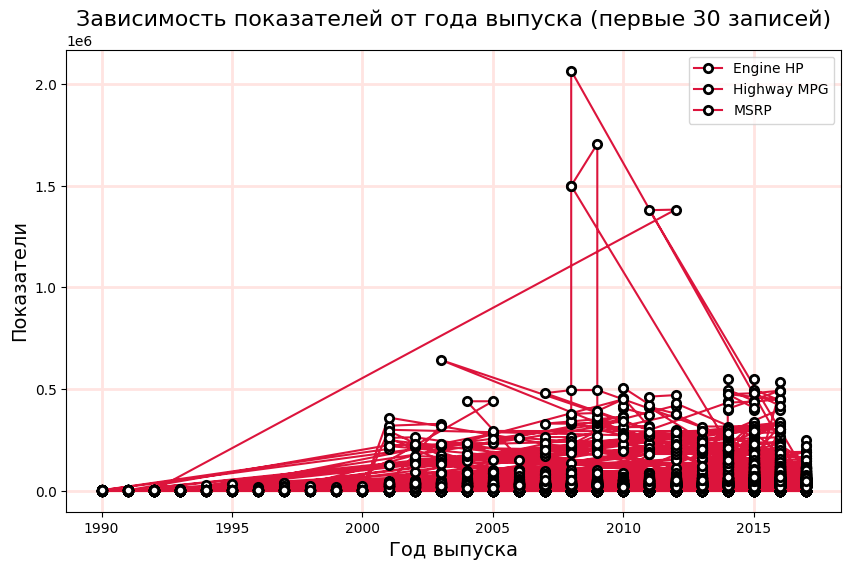

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка очищенного датасета
df = pd.read_csv('cleaned_data.csv')

# Ограничение по первым 30 записям
df_filtered = df[['Year', 'Engine HP', 'highway MPG', 'MSRP']].dropna() #.head(30)

# Построение линейных графиков зависимости показателей от года выпуска
plt.figure(figsize=(10, 6))

# График зависимости Engine HP от Year
plt.plot(df_filtered['Year'], df_filtered['Engine HP'], label='Engine HP', marker='o', color='crimson',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# График зависимости highway MPG от Year
plt.plot(df_filtered['Year'], df_filtered['highway MPG'], label='Highway MPG', marker='o', color='crimson',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# График зависимости MSRP от Year
plt.plot(df_filtered['Year'], df_filtered['MSRP'], label='MSRP', marker='o', color='crimson',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

# Добавление заголовка и подписей к осям
plt.title('Зависимость показателей от года выпуска (первые 30 записей)', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Показатели', fontsize=14)

# Включение легенды
plt.legend()

# Настройка сетки
plt.grid(True, linewidth=2, color='mistyrose')

# Отображение графика
plt.show()


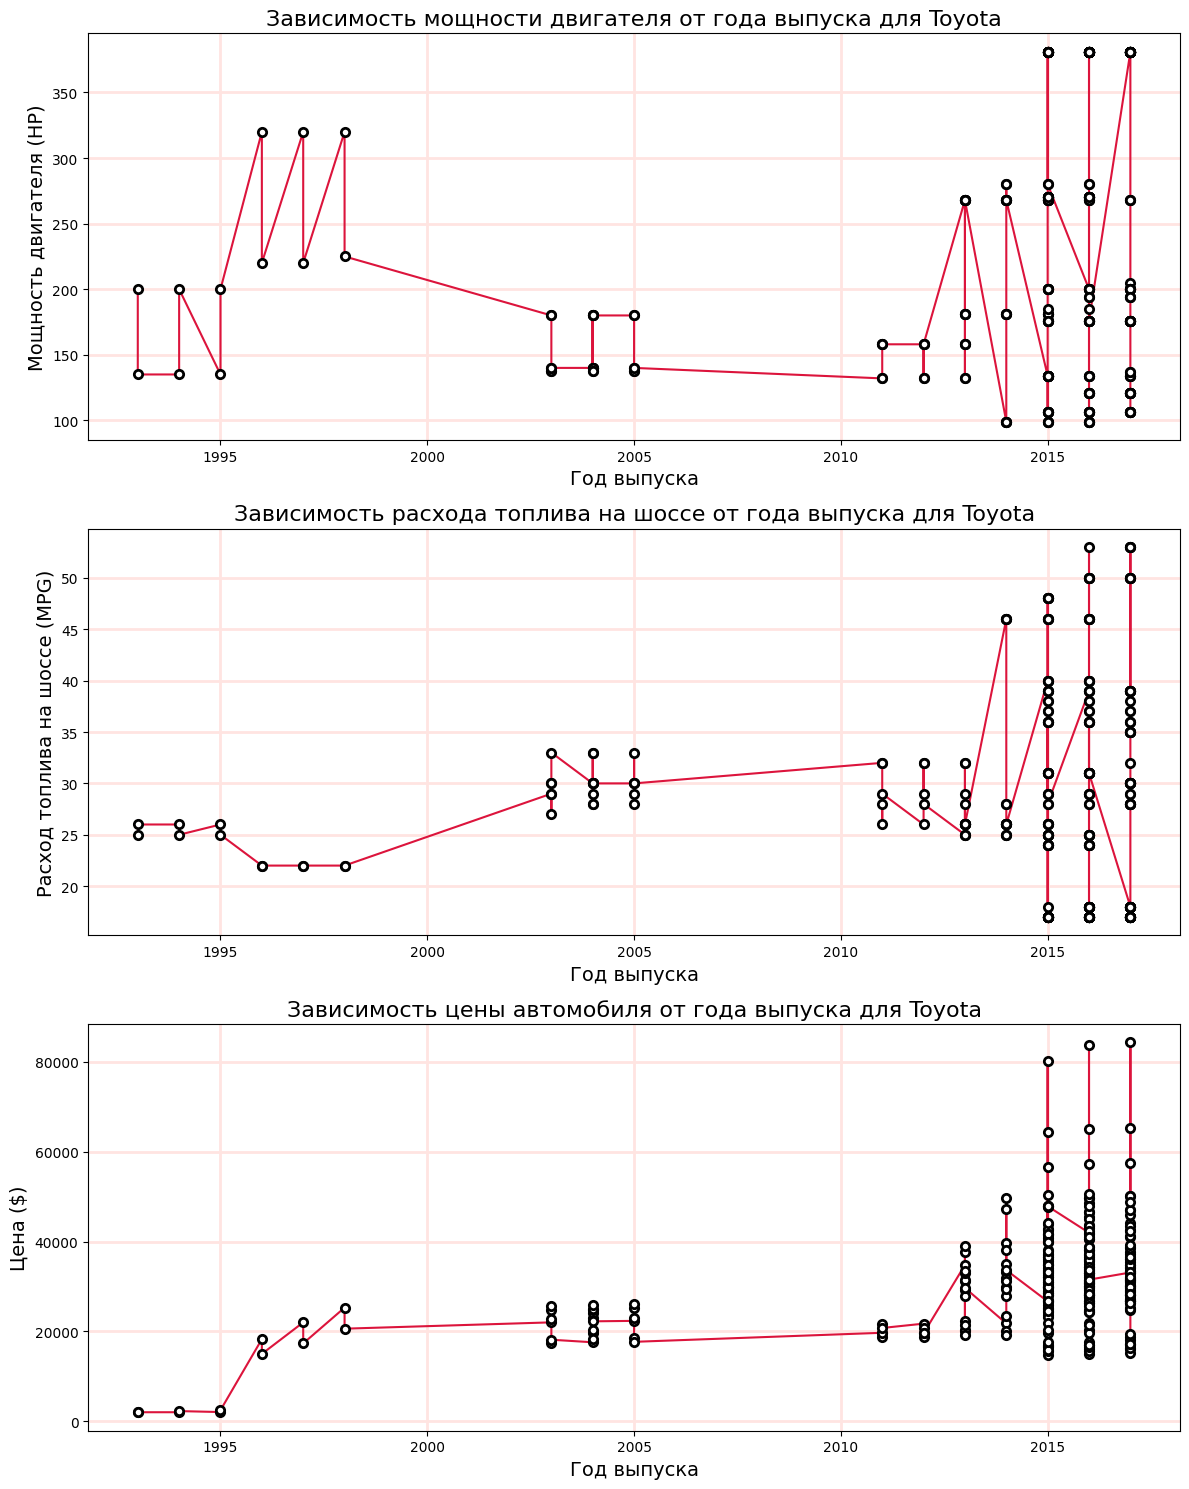

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка очищенного датасета
df = pd.read_csv('cleaned_data.csv')

# Указание марки автомобиля для фильтрации
selected_make = 'Toyota'  # Замените на нужную марку

# Фильтрация по выбранной марке и сортировка по году
df_filtered = df[df['Make'] == selected_make][['Year', 'Engine HP', 'highway MPG', 'MSRP']].dropna().sort_values(by='Year')

# Проверка, что после фильтрации остались данные
if df_filtered.empty:
    print(f"Нет данных для марки {selected_make}")
else:
    # Построение трёх отдельных графиков
    plt.figure(figsize=(12, 15))

    # График 1: Зависимость Engine HP от Year
    plt.subplot(3, 1, 1)
    plt.plot(df_filtered['Year'], df_filtered['Engine HP'], label='Engine HP', marker='o', color='crimson',
             markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    plt.title(f'Зависимость мощности двигателя от года выпуска для {selected_make}', fontsize=16)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Мощность двигателя (HP)', fontsize=14)
    plt.grid(True, linewidth=2, color='mistyrose')

    # График 2: Зависимость highway MPG от Year
    plt.subplot(3, 1, 2)
    plt.plot(df_filtered['Year'], df_filtered['highway MPG'], label='Highway MPG', marker='o', color='crimson',
             markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    plt.title(f'Зависимость расхода топлива на шоссе от года выпуска для {selected_make}', fontsize=16)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Расход топлива на шоссе (MPG)', fontsize=14)
    plt.grid(True, linewidth=2, color='mistyrose')

    # График 3: Зависимость MSRP от Year
    plt.subplot(3, 1, 3)
    plt.plot(df_filtered['Year'], df_filtered['MSRP'], label='MSRP', marker='o', color='crimson',
             markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    plt.title(f'Зависимость цены автомобиля от года выпуска для {selected_make}', fontsize=16)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Цена ($)', fontsize=14)
    plt.grid(True, linewidth=2, color='mistyrose')

    # Настройка отступов между графиками
    plt.tight_layout()

    # Отображение графиков
    plt.show()

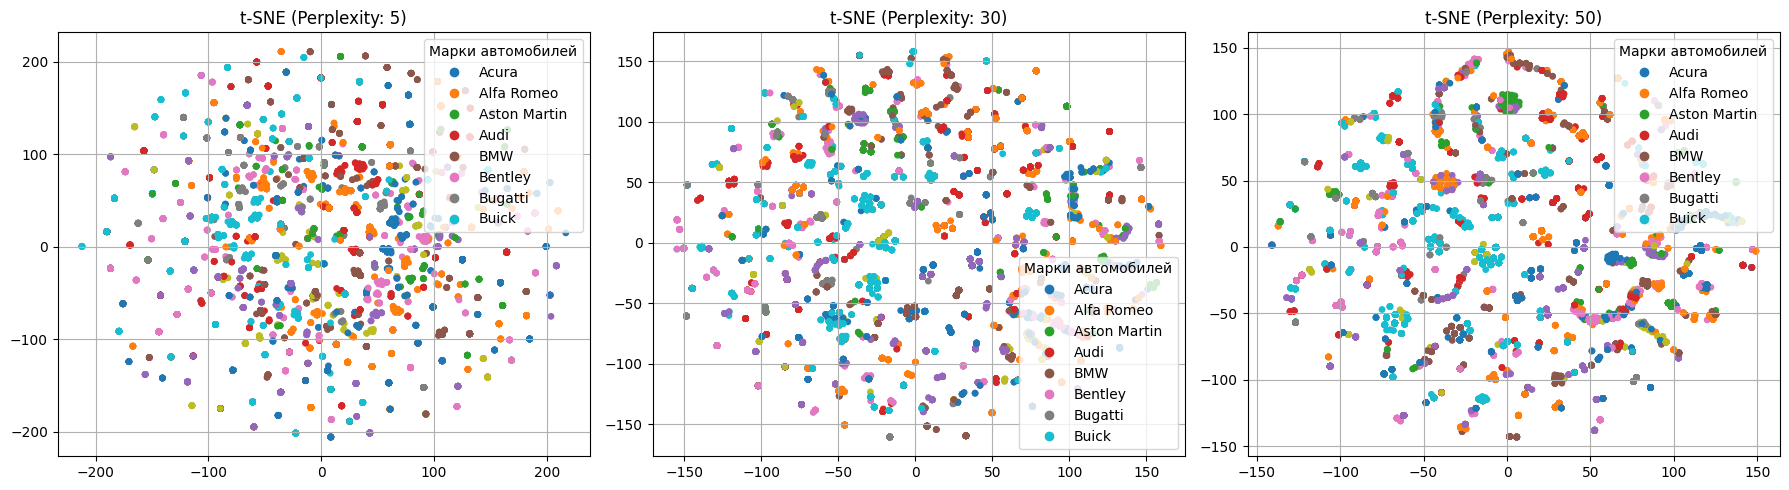

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Загрузка данных автомобилей (замените на ваш путь к cleaned_data.csv)
df = pd.read_csv('cleaned_data.csv')

# Выбор признаков для анализа и целевого столбца (марка автомобиля)
X = df[['Engine HP', 'Engine Cylinders']]  # выберите ваши признаки
y = df['Make']  # используем марки автомобилей как метки

# Преобразование меток в числовой формат с помощью LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
unique_labels = label_encoder.classes_  # получение оригинальных меток марок

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация с использованием t-SNE для разных значений перплексии
perplexities = [5, 30, 50]

plt.figure(figsize=(18, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    # Построение графика
    plt.subplot(1, 3, i + 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='tab10', s=15)
    
    # Отображение названий марок в легенде
    handles, _ = scatter.legend_elements()
    plt.legend(handles, unique_labels, title="Марки автомобилей")
    
    plt.title(f't-SNE (Perplexity: {perplexity})')
    plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



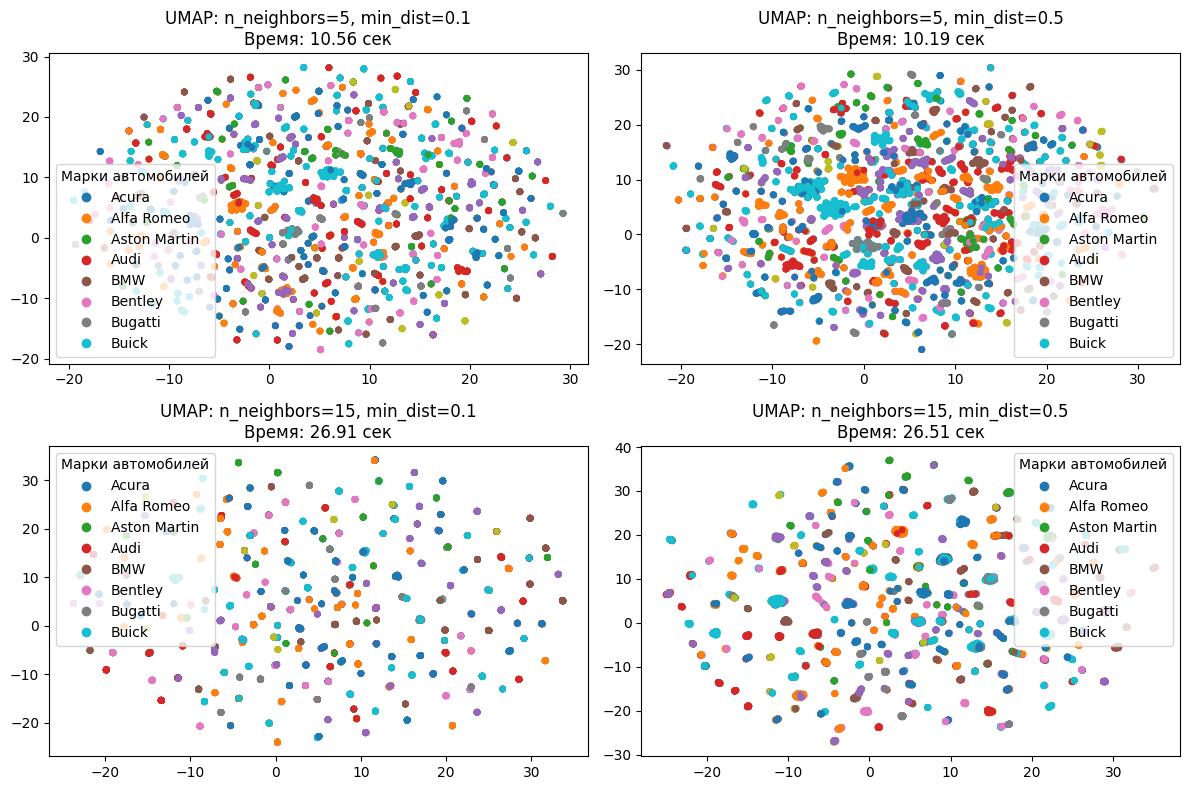

C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



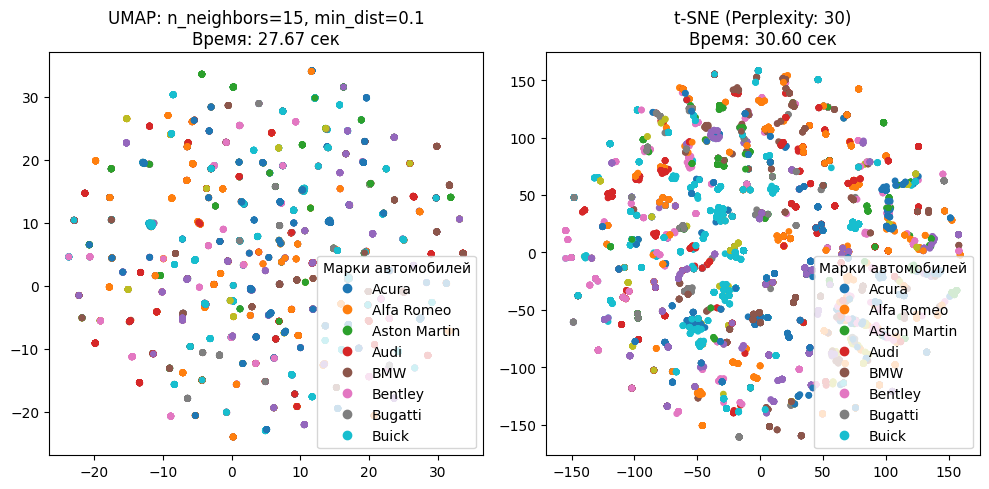

Время работы UMAP: 27.67 секунд
Время работы t-SNE: 30.60 секунд


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Загрузка данных автомобилей (замените на ваш путь к cleaned_data.csv)
df = pd.read_csv('cleaned_data.csv')

# Выбор признаков для анализа и целевого столбца (марка автомобиля)
X = df[['Engine HP', 'Engine Cylinders']]  # выберите ваши признаки
y = df['Make']  # используем марки автомобилей как метки

# Преобразование меток в числовой формат с помощью LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
unique_labels = label_encoder.classes_  # получение оригинальных меток марок

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Функция для измерения времени выполнения и визуализации UMAP
def plot_umap(X, y, n_neighbors, min_dist, ax):
    start_time = time.time()
    
    # Применение UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42, init='random')
    X_umap = reducer.fit_transform(X)
    
    # Время выполнения UMAP
    elapsed_time = time.time() - start_time
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=15)
    
    # Легенда с названиями марок
    handles, _ = scatter.legend_elements()
    ax.legend(handles, unique_labels, title="Марки автомобилей")
    
    ax.set_title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}\nВремя: {elapsed_time:.2f} сек')
    return elapsed_time

# Функция для измерения времени выполнения и визуализации t-SNE
def plot_tsne(X, y, perplexity, ax):
    start_time = time.time()
    
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Время выполнения t-SNE
    elapsed_time = time.time() - start_time
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
    
    # Легенда с названиями марок
    handles, _ = scatter.legend_elements()
    ax.legend(handles, unique_labels, title="Марки автомобилей")
    
    ax.set_title(f't-SNE (Perplexity: {perplexity})\nВремя: {elapsed_time:.2f} сек')
    return elapsed_time

# Визуализация UMAP с различными параметрами n_neighbors и min_dist
n_neighbors_list = [5, 15]
min_dist_list = [0.1, 0.5]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, n_neighbors in enumerate(n_neighbors_list):
    for j, min_dist in enumerate(min_dist_list):
        plot_umap(X_scaled, y_encoded, n_neighbors, min_dist, axes[i, j])

plt.tight_layout()
plt.show()

# Сравнение времени работы UMAP и t-SNE
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
umap_time = plot_umap(X_scaled, y_encoded, n_neighbors=15, min_dist=0.1, ax=ax1)

ax2 = plt.subplot(1, 2, 2)
tsne_time = plot_tsne(X_scaled, y_encoded, perplexity=30, ax=ax2)

plt.tight_layout()
plt.show()

print(f"Время работы UMAP: {umap_time:.2f} секунд")
print(f"Время работы t-SNE: {tsne_time:.2f} секунд")